## __Image Processing__


__Introduction__


Image processing is a method of performing certain image operations to obtain an enhanced image or extract some useful information from it. It is a form of signal processing in which input is an image, and output may be image or features/functions associated with that image.


In general, Image processing may include 
: Importing the image via image acquisition tools; Analyzing and manipulating the image; Output in which results are altered based on image analysis, etc.


# __Image Processing operator:__

A general image processing operator is a function that takes one or more input images and produces an output image.
The image transformation can be seen as:
* Point operators (pixel transforms) 
* Neighbourhood (area-based) operators/ filters



__Point Operators__


The Point operators are a simple image manipulation method in image processing in which output pixel value depends only on the corresponding input value. 

It Includes:
1. Brightness and contrast adjustment. 
2. Color correction and color transformation.








__Brightness and contrast adjustment__


<image>
<center>


<p>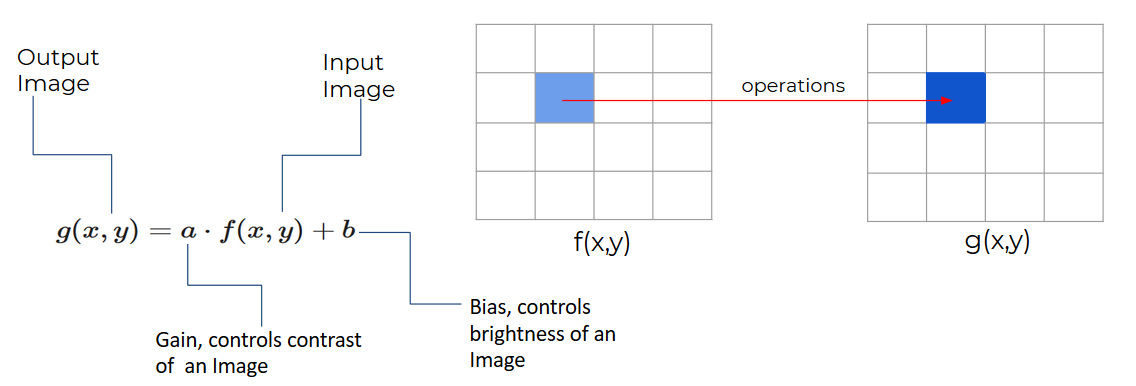</p>
<Figcaption>Figure 1: Brightness and Contrast adjustment using Point Operator</Figcaption>
</center>
</image>


Recall the `Image as a Matrix.`

- Input Image: $f(x,y)$

- Output Image: $g(x,y)$

where $x$ and $y$ are horizontal and vertical co-ordinates pointing to a pixel of an image.

The value of function $f(x,y)$ gives the characteristic of the point on an image


We can represent Images as a function too.

- Input Image: $f(k)$

- Output Image: $g(k)$

Where $K = (x,y)$ you can change value of x and y because they are horizontal and vertical co-ordinates that gives pixel intensity value.


The brightness and Contrast adjustment using point operator can be represented as:




$g(k) = a~.f(k) + b$

where,

* $a$ is gain and $a>0$ and controls contrast,

* $b$ is bias and controls brightness

_You can think of f(k) as the source image pixels and g(k) as the output image pixels. Then, more conveniently we can write the expression as_


$g(x,y)= a⋅f(x,y)+b$

where `x` and `y` indicates that the pixel is located in the `x-th row and yth column.`


* To selectively darken
the sky or when modeling vignetting in an optical system you can spatially change $a ~ and ~b $



<image>
<center>


<p>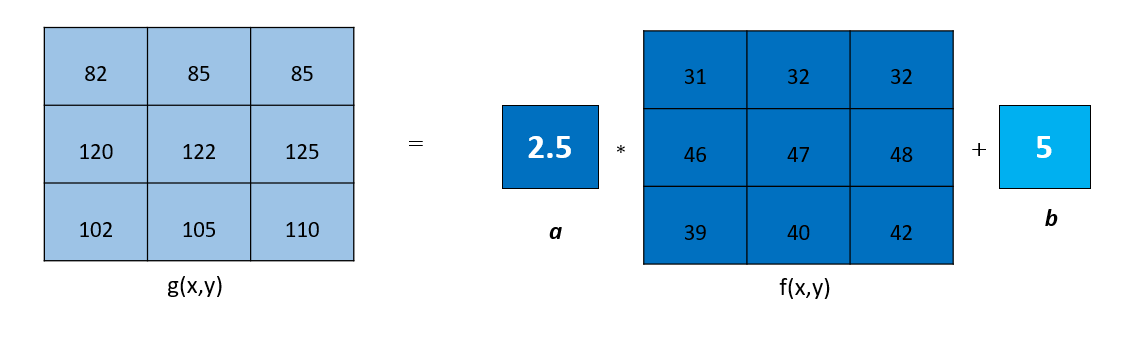</p>
<Figcaption>Figure 2: Working/Math of Point Operators</Figcaption>
</center>
</image>


The value of $a~ and~ b$ is [broadcasted](https://numpy.org/doc/stable/user/basics.broadcasting.html)  and the point operation is applied as shown in the figure.




* If $b > 0$ Brightness  increases else Brightness decreases.

* If $a > 1$ contrast is increased.
* If $a < 1$ contrast is reduced
* If $a$ is negative dark area becomes light and light area becomes dark.


__Example:__
$g(x,y)= a⋅f(x,y)+b$


In [1]:
#installing OpenCV using pip:
!pip install opencv-python

In [2]:
#installing scikit-learn using pip:
!pip install scikit-learn

In [3]:
# Importing OpenCV and others Libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from IPython.display import display, Image

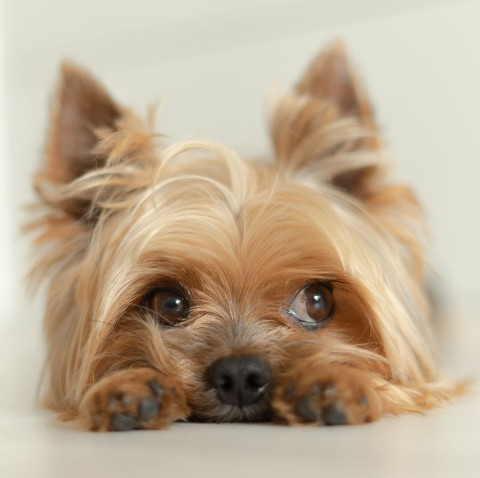

In [4]:
# Reading the image using OpenCV
image = cv2.imread('image.jpg')

# Checking if the image was read successfully
if image is None:
    print("Image not found or invalid format")
else:
    # Display the image using IPython.display
    display(Image(filename='image.jpg'))

Applying some operation on this Image and store the result. 




* Initial pixel values equal to zero
* Same size and type as the original image


In [5]:
new_image = np.zeros(image.shape, image.dtype)

#np.zeros: This is a NumPy function that creates a new array filled with zeros.
#image.shape: The shape attribute of a NumPy array returns a tuple representing the dimensions of the array. It typically has the form (height, width) for 2D arrays or (height, width, channels) for 3D arrays, where "height" represents the number of rows, "width" represents the number of columns, and "channels" (if present) represent the number of color channels (e.g., 3 for RGB images).
#image.dtype: The dtype attribute of a NumPy array specifies the data type of the elements in the array, such as float32, int64, uint8, etc. It ensures that the new array has the same data type as the image array.

_Using an arbitrary value of $a ~and~ b$._


_Use $ a=2.5 ~ and ~ b=5$_


In [6]:
a = 2.5 # contrast control
b = 5 #  brightness control

In [7]:
new_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Doing the operation $g(x,y) = a * f(x,y) + b$

The simplest way to access the pixels  is using 'for' loops.



In [8]:
image.shape

(478, 480, 3)

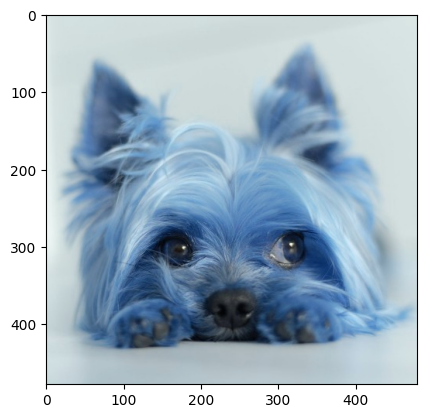

In [9]:
plt.imshow(image,cmap='gray')
#plt.imshow: This is a Matplotlib function used to display an image.
#cmap='gray': This is an optional parameter that specifies the colormap to be used when displaying the image. In this case, 'gray' is used, which indicates that the image should be displayed in grayscale. 

In [10]:
for y in range(image.shape[0]):
#image.shape[0] gives the number of rows in the image.
    for x in range(image.shape[1]):
    #image.shape[1] gives the number of columns in the image.
        new_image[y,x] = np.clip(a*image[y,x] + b, 0, 255)
        #image[y, x]: This accesses the intensity value of the pixel at coordinates (y, x) in the original image.
        #a * image[y, x] + b: This is a linear transformation applied to the pixel's intensity. The pixel's intensity is scaled by a factor a and then offset by b.

In [11]:
new_image[0:5,0:5]
#This is used to extract a subregion or submatrix from the new_image.
#This code selects a 5x5 portion of the new_image array, starting from the top-left corner. 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

Display New Image.


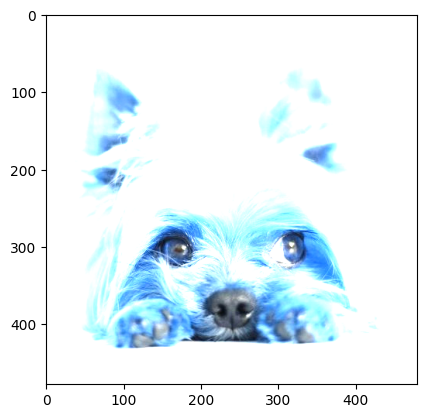

In [12]:
plt.imshow(new_image,cmap='gray')

OpenCV also provides an alternative and optimzed solution to the for loops to perform the action


```
new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
```


Let's use the Alternative technique using different values of `a and b.`


In [13]:
#Ploting Two Image
def plot_two_images(image, new_image,title1, title2):
    """
    Plot two Images

    Parameters
    ----------
    image:  Image or numpy.ndarray
        First Image to be plotted.
    new_image: a number or float or int 
        Second Image to be plotted.
    title1: text or string  
        Title for First Image
    title2: text or string
        Title for second Image
    """
    f, axes = plt.subplots(1, 2 , figsize=(10,8))
    #This means there will be one row and two columns of subplots in the figure, and the figure will have a size of 10x8 inches.
    
    axes[0].imshow(image,cmap='gray')
    axes[1].imshow(new_image,cmap='gray')
    #It assigns the two subplots to the axes variable. axes[0] corresponds to the left subplot, and axes[1] corresponds to the right subplot.
    
    plt.setp(axes[0], xlabel=title1)
    plt.setp(axes[1], xlabel=title2)
    #It sets the x-axis labels of both subplots using plt.setp(axes[0], xlabel=title1) and plt.setp(axes[1], xlabel=title2), where title1 and title2 are the titles provided as parameters.
    
    f.tight_layout()
    #It ensures that the subplots are tightly arranged within the figure 

    plt.savefig('Image point operator.JPG')
    plt.show()

In [14]:
new_image = cv2.convertScaleAbs(image, alpha=a, beta=b)

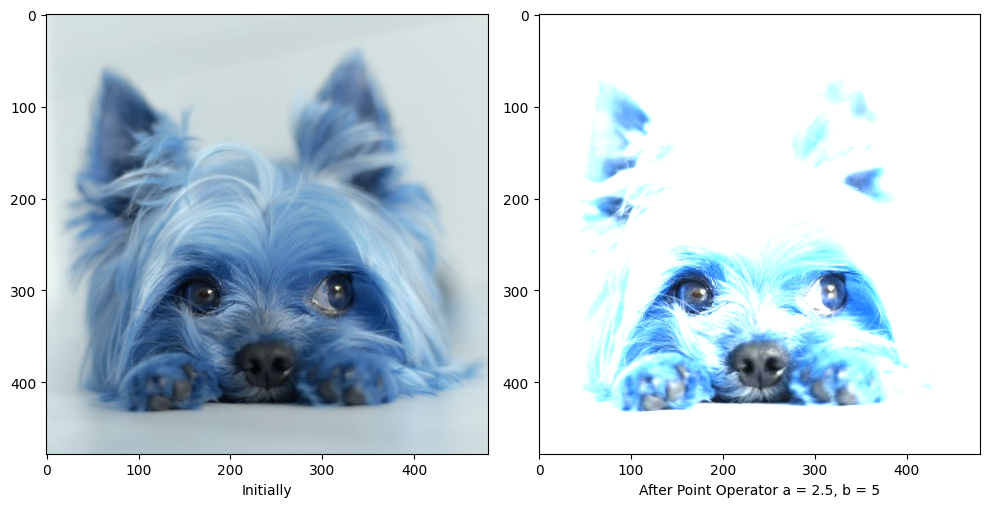

In [15]:
plot_two_images(image,new_image,title1='Initially', title2='After Point Operator a = 2.5, b = 5')

In [16]:
new_image_2 = cv2.convertScaleAbs(image, alpha=3, beta=10)

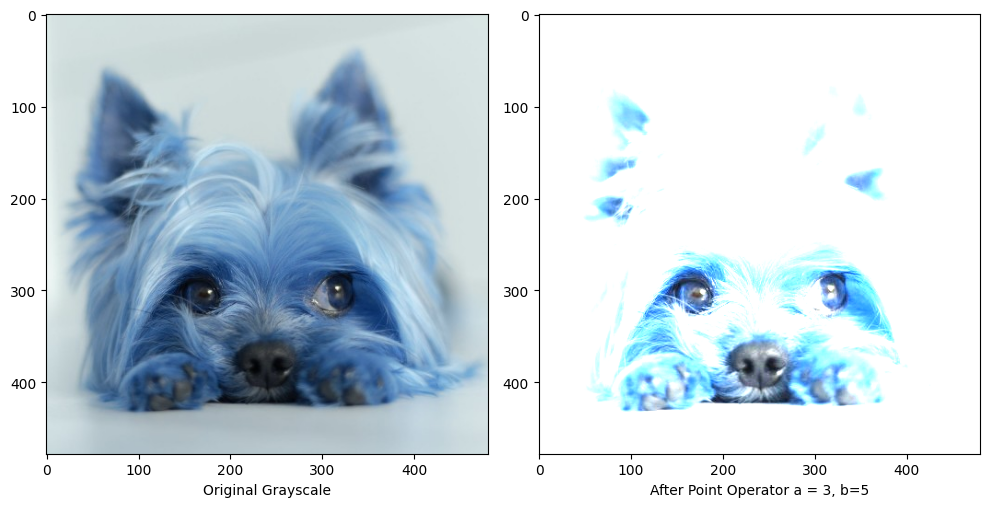

In [17]:
plot_two_images(image, new_image_2, title1="Original Grayscale", title2="After Point Operator a = 3, b=5")

## __Image Restoration__


Image restoration is a process in image processing and computer vision that aims to enhance or restore the quality of a degraded or damaged image.

Image restoration in image processing refers to the process of enhancing the quality and clarity of an image by reversing or mitigating the effects of various forms of degradation that can occur during image acquisition, transmission, or storage.

Image restoration is the operation of taking a corrupt/noisy image and estimating the clean, original image.

__Image inpainting__ is the process of removing damage, such as noises, strokes or text, on images. It is particularly useful in the restoration of old photographs which might have scratched edges or ink spots on them. These can be digitally removed through this method.

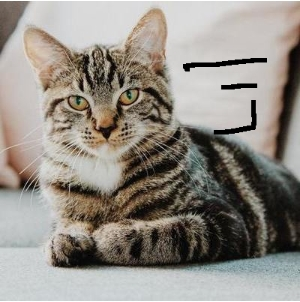

In [18]:
# Reading the image using OpenCV
damaged_image = cv2.imread('damaged_image.jpg')

# Check if the image was read successfully
if damaged_image is None:
    print("Image not found or invalid format")
else:
    # Display the image using IPython.display
    display(Image(filename='damaged_image.jpg'))

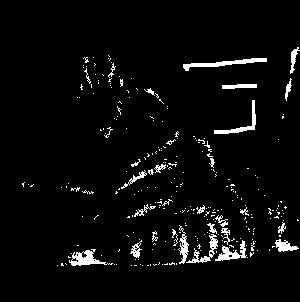

In [19]:
# Reading the image from the disk using cv2.imread() function
damaged_image  = cv2.imread(filename=r"damaged_image.jpg")

# geting the shape of the image
height, width = damaged_image.shape[0], damaged_image.shape[1]

# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if damaged_image[i, j].sum() > 40:
            damaged_image[i, j] = 0
        else:
            damaged_image[i, j] = [255, 255, 255]

# saving the mask image
mask = damaged_image
cv2.imwrite('mask_image.jpg', mask)

# Display the mask image using IPython.display
display(Image(filename='mask_image.jpg'))

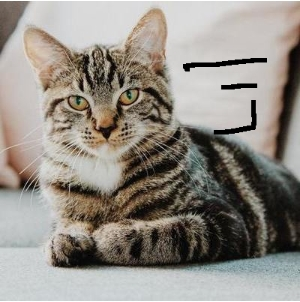

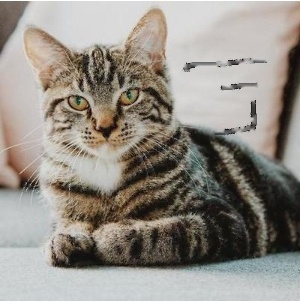

In [20]:
# Reading image from the disk using cv2.imread() function
damaged_image = cv2.imread('damaged_image.jpg')

# Loading the mask (assuming the mask is in grayscale)
mask = cv2.imread('mask_image.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the mask to match the dimensions of the damaged image
mask = cv2.resize(mask, (damaged_image.shape[1], damaged_image.shape[0]))

# Perform inpainting using the KNN method to restore the damaged image completely clean
restored_image = cv2.inpaint(damaged_image, mask, inpaintRadius=3, flags=cv2.INPAINT_NS)

# Save the restored image
cv2.imwrite('restored.jpg', restored_image)

# Display the original damaged image and the restored image using IPython.display
display(Image(filename='damaged_image.jpg'))
display(Image(filename='restored.jpg'))

## Linear filtering:

Linear filtering is a fundamental image processing technique used to enhance or extract specific features from an image.

It operates on the principle of applying a convolution kernel (also known as a filter or mask) to each pixel in the image.

This kernel defines a weighted average of the pixel values in the local neighborhood of each pixel, resulting in a new pixel value in the output image.

Linear filtering is widely used for tasks such as blurring, sharpening, edge detection, and noise reduction. 


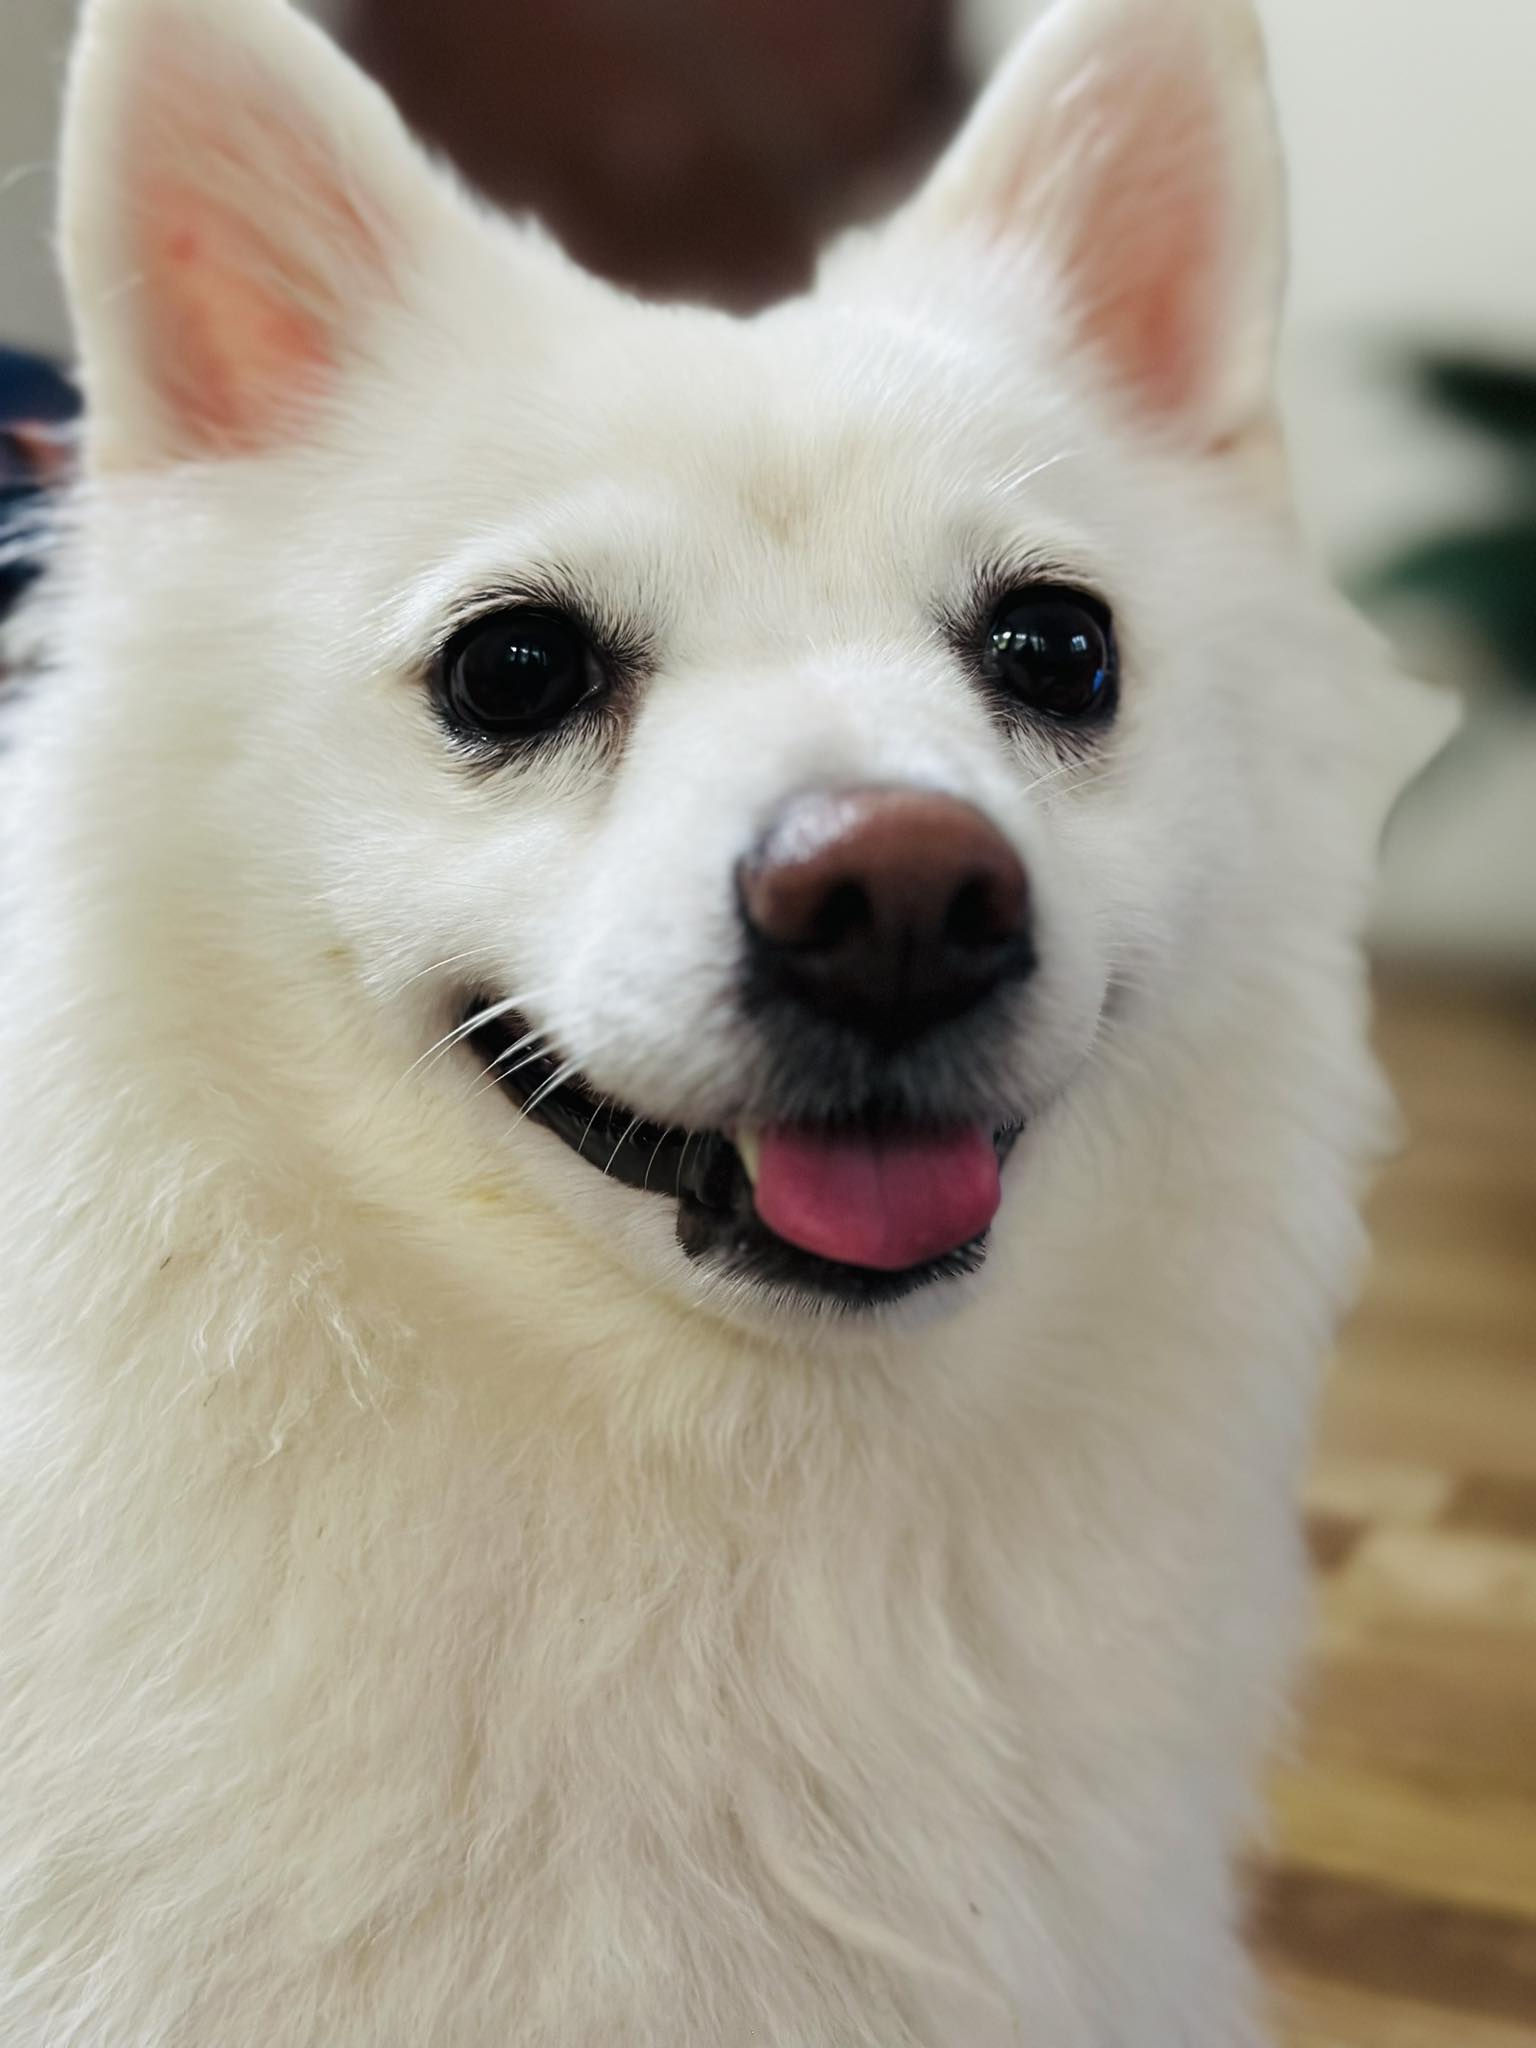

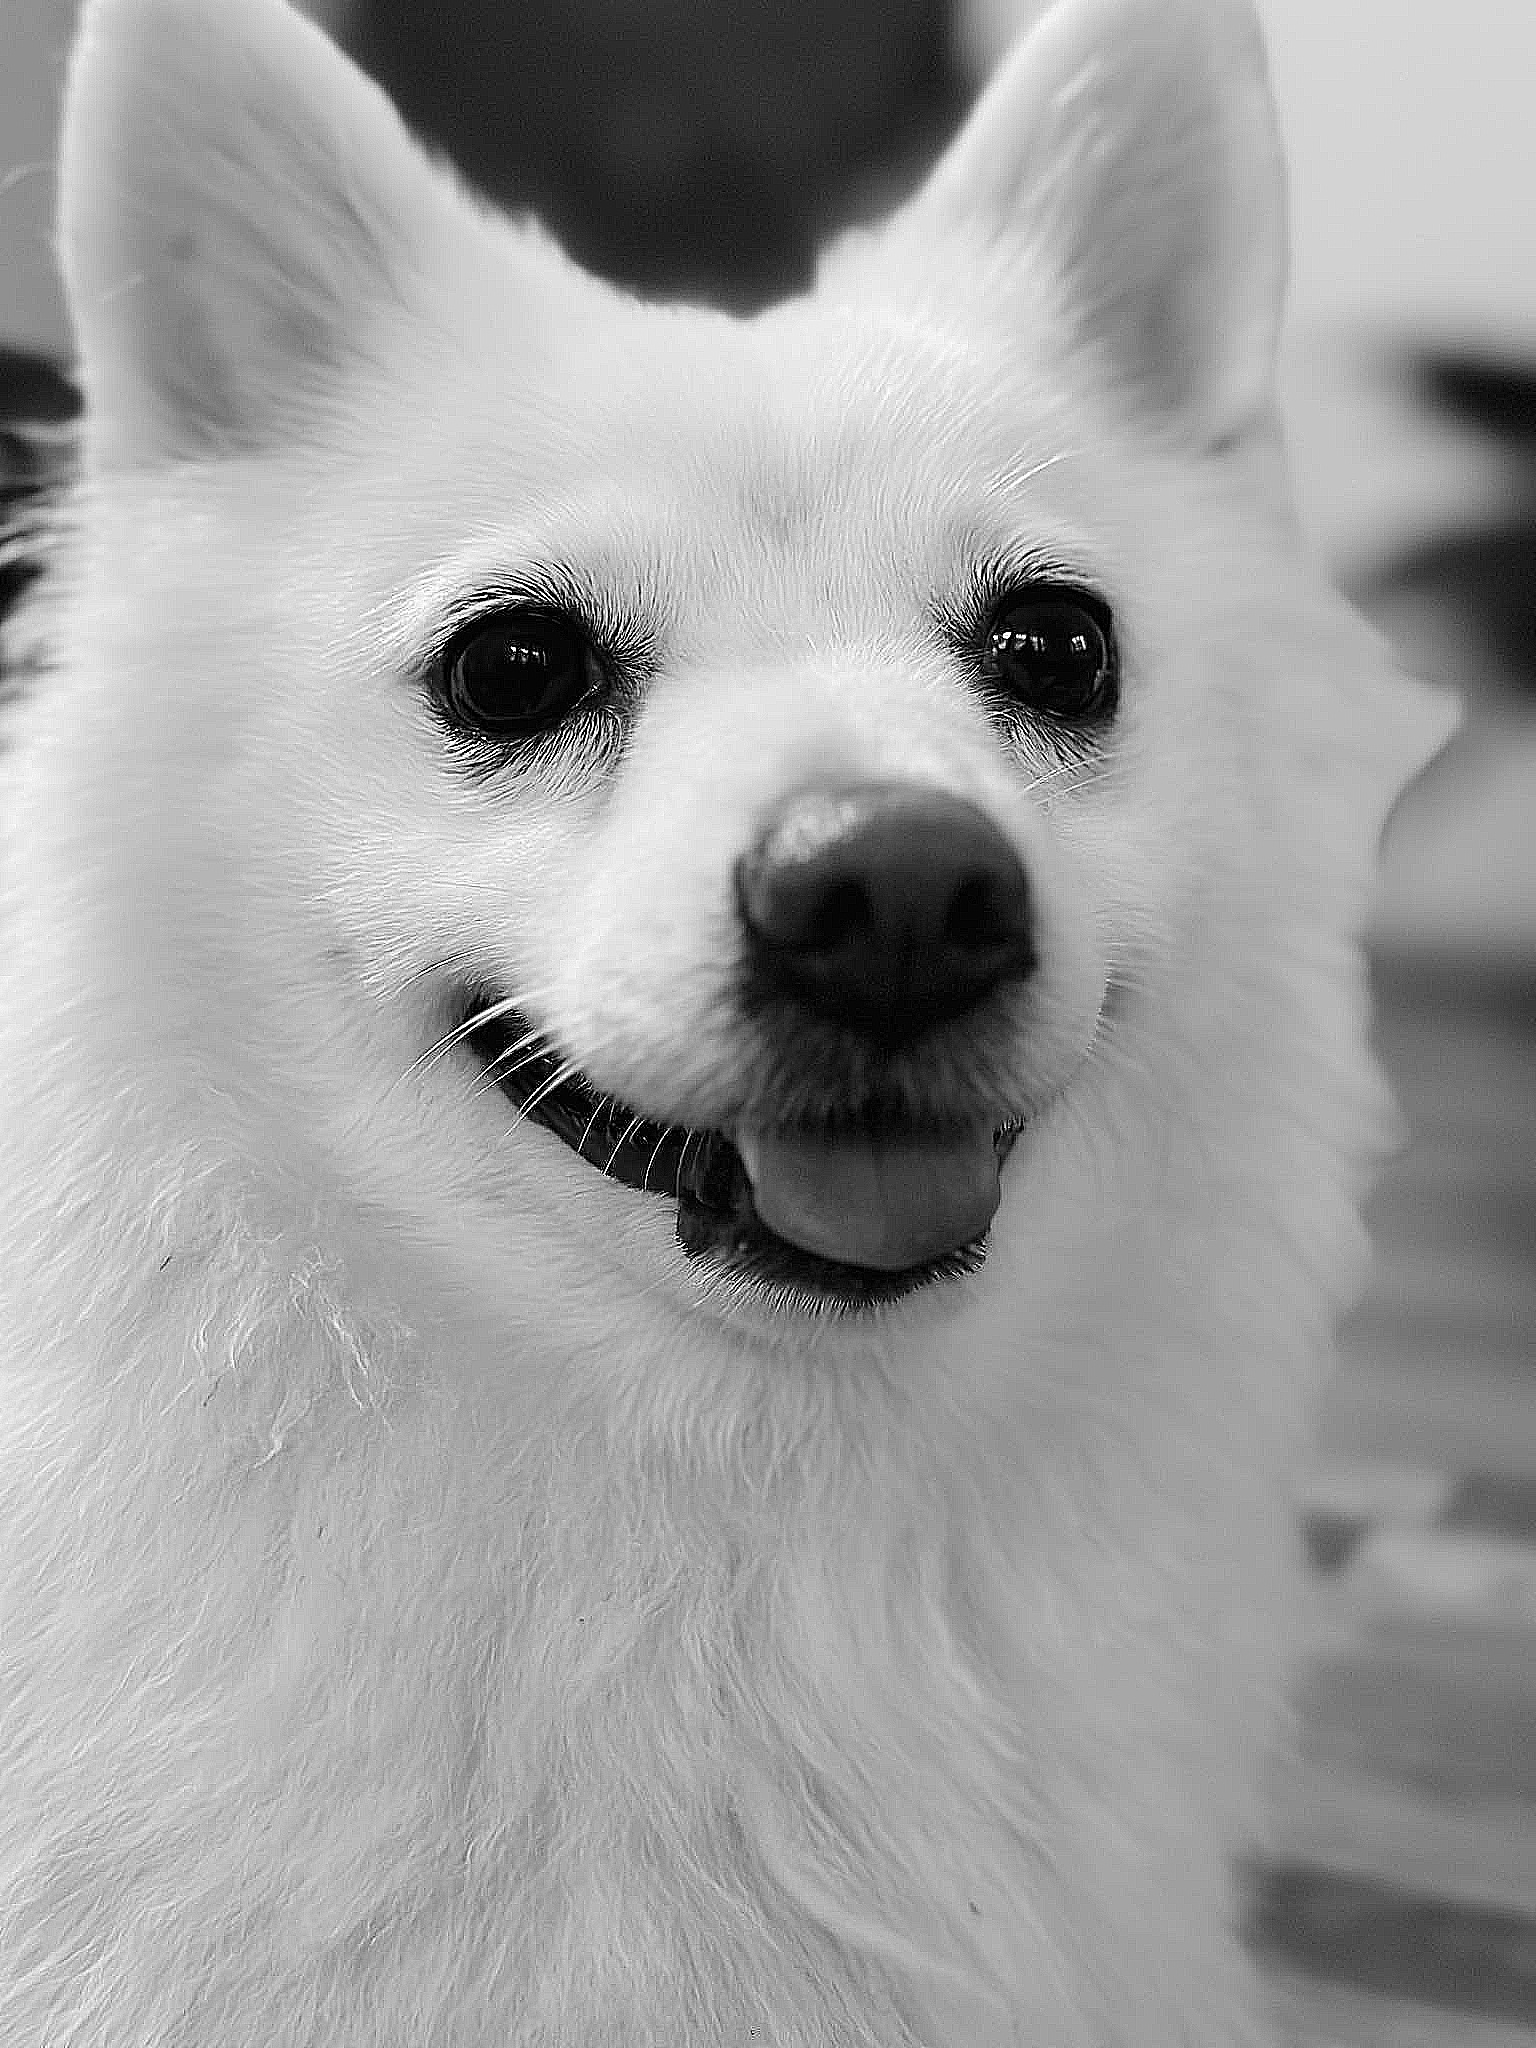

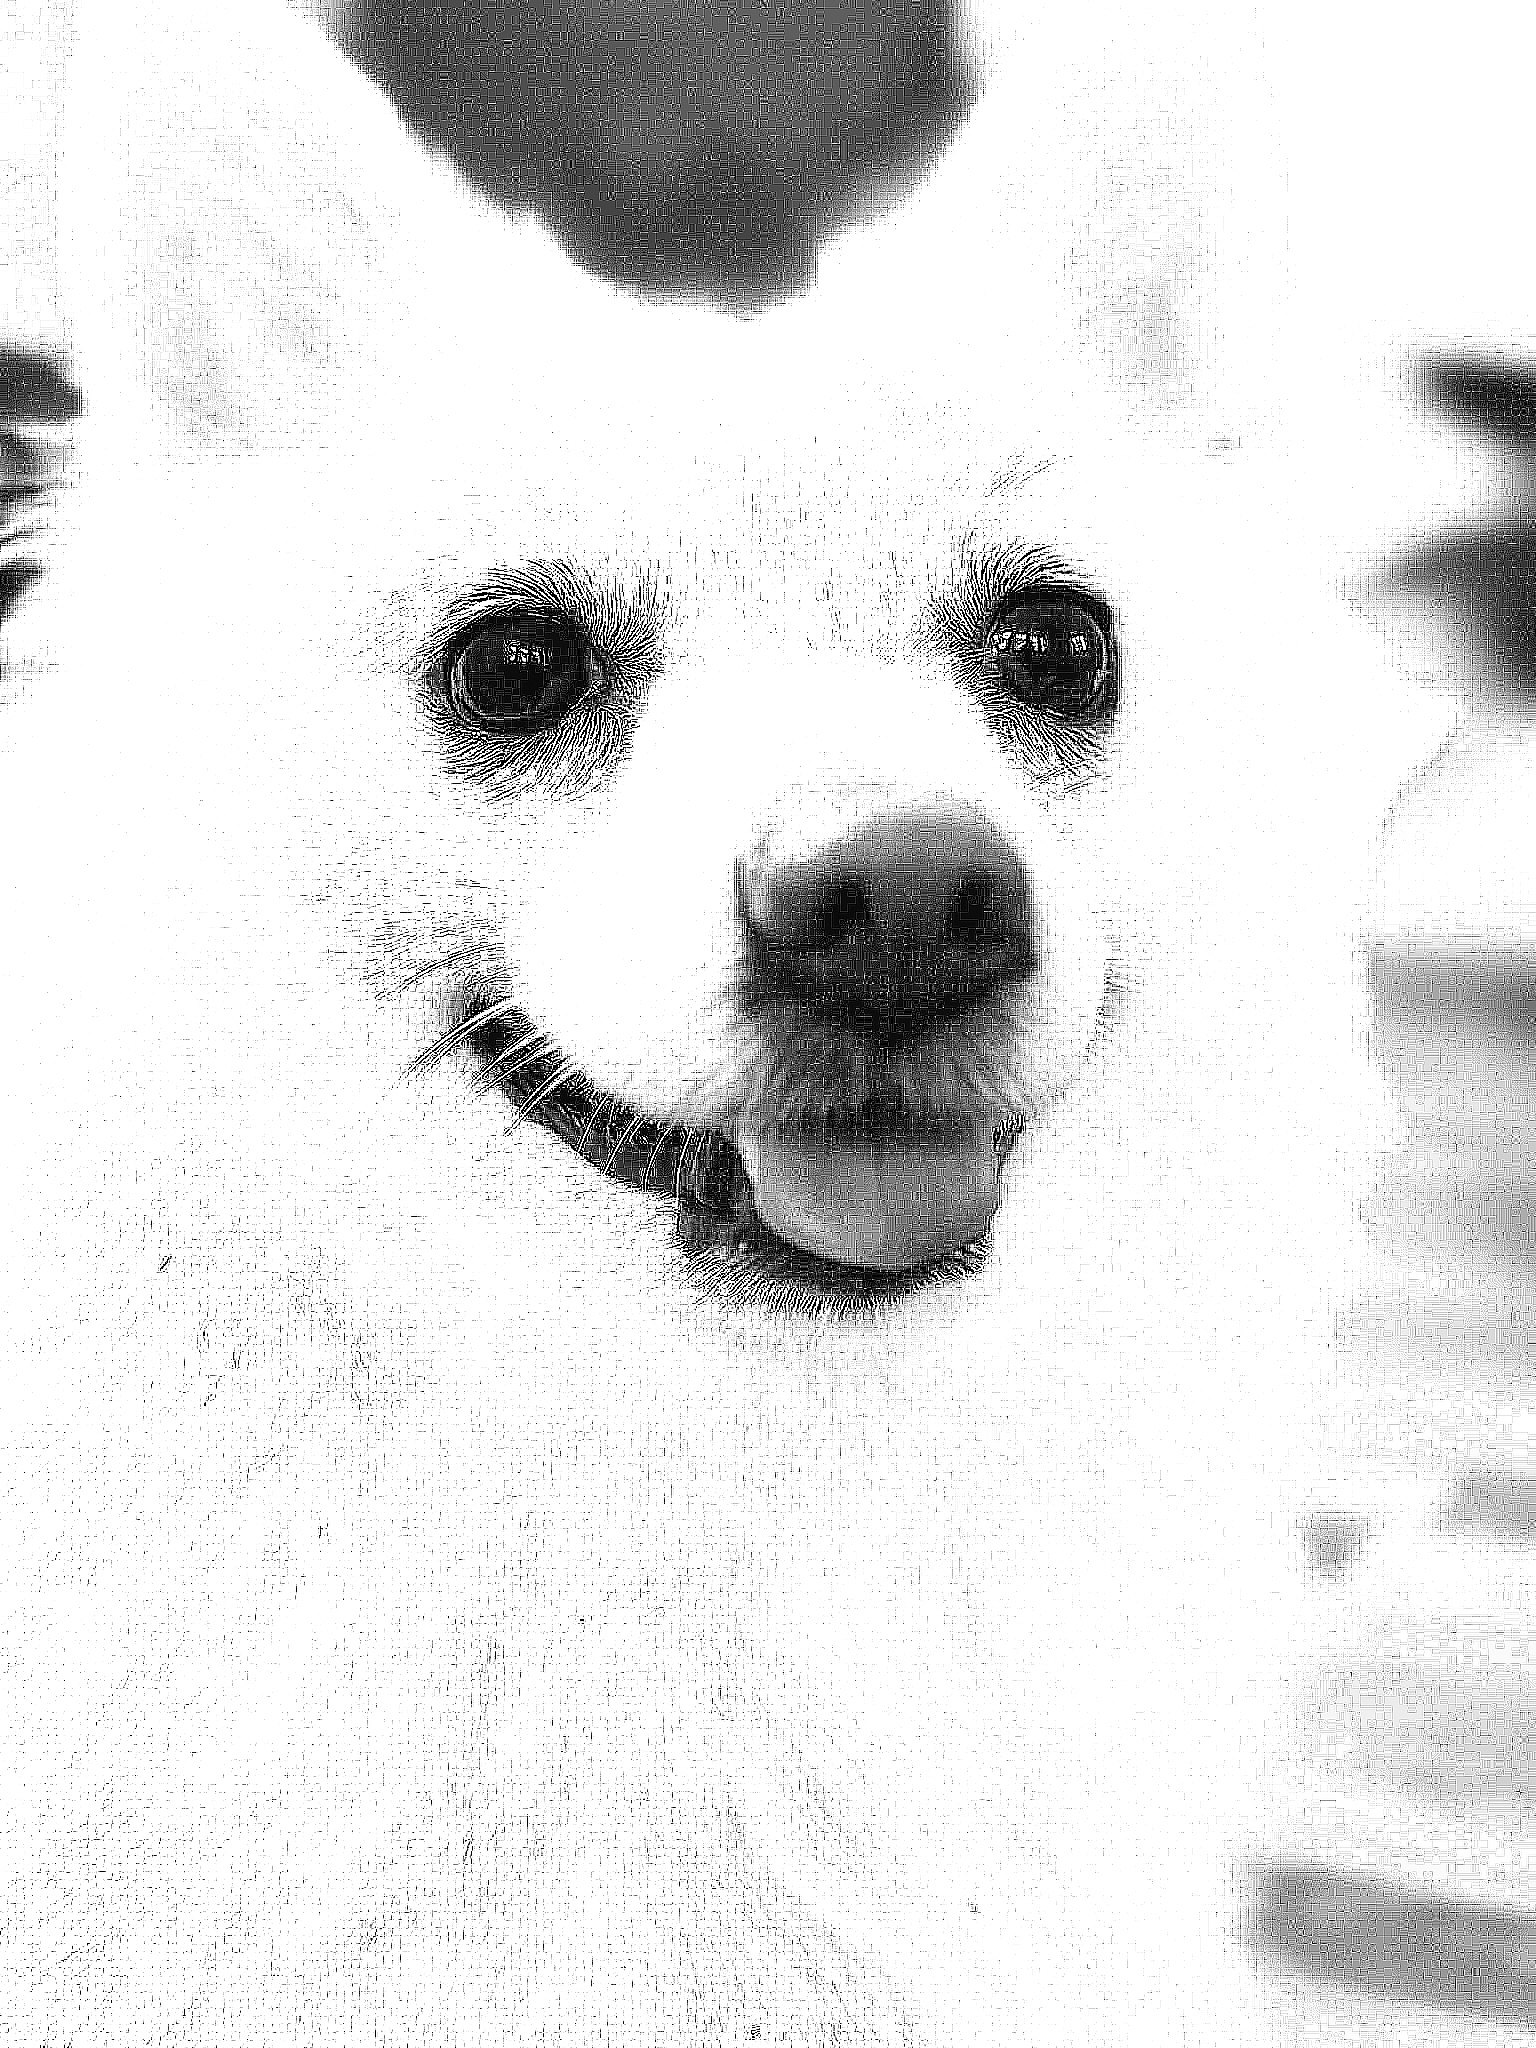

In [24]:
# Reading the image using OpenCV
image_path = 'kiki.jpg'
image = cv2.imread(image_path)

# Check if the image was read successfully
if image is None:
    print("Image not found or invalid format")
else:
    # Display the original image in JPG format
    display(Image(filename=image_path, format='jpg', width=300))

    # Converting the image into grayscale (for edge detection)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define a 3x3 Gaussian blur kernel for smoothing
    gaussian_kernel = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])

    # Apply Gaussian blur to the grayscale image
    blurred_image = cv2.filter2D(gray_image, -1, gaussian_kernel)

    # Define a kernel for edge detection (sharpening)
    edge_kernel = np.array([[-1, -1, -1],
                            [-1, 10, -1],
                            [-1, -1, -1]])

    # Apply edge detection to the grayscale image
    sharpened_image = cv2.filter2D(blurred_image, -1, edge_kernel)

    # Converting OpenCV images to PIL format for displaying
    blurred_pil_image = Image(data=cv2.imencode('.jpg', blurred_image)[1].tobytes(), format='jpg', width=300)
    display(blurred_pil_image)  # Displaying the blurred image

    sharpened_pil_image = Image(data=cv2.imencode('.jpg', sharpened_image)[1].tobytes(), format='jpg', width=300)
    display(sharpened_pil_image)  # Displaying the sharpened image

## Independent Component Analysis

Independent Component Analysis (ICA) is a powerful technique in image processing for separating mixed sources within images and extracting meaningful components.

It is particularly useful when dealing with images where multiple sources are mixed together, and the goal is to uncover the original sources or components.

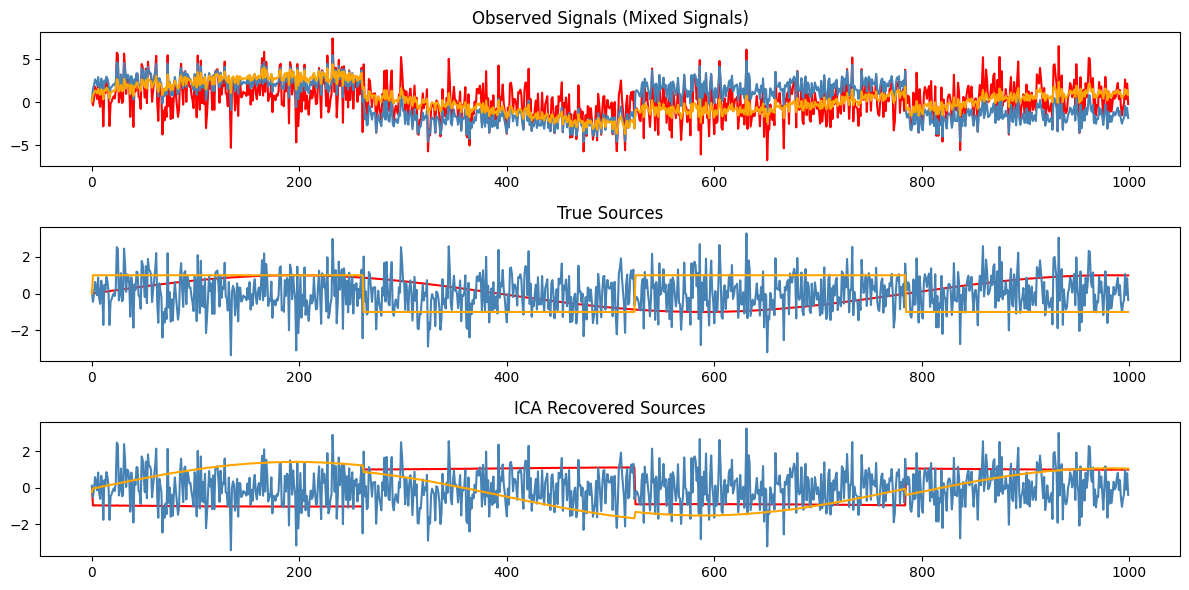

In [25]:
#This line imports the FastICA class from the scikit-learn library's decomposition module. 
from sklearn.decomposition import FastICA

# Generating time values
n_samples = 1000
time = np.linspace(0, 4, n_samples)

# Creating the three source signals
s1 = np.sin(2 * time)  # Signal 1: Sinusoidal signal
s2 = np.random.randn(n_samples)  # Signal 2: Gaussian noise
s3 = np.sign(np.sin(3 * time))  # Signal 3: Square signal

# Stack the source signals into a matrix
S = np.c_[s1, s2, s3]

# Mixing the source signals using a mixing matrix
A = np.array([[1, 2, 0.5], [0.5, 1, 2], [2, 0.5, 1]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observed signals

# Compute ICA to recover the original sources
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct sources
A_ = ica.mixing_  # Estimated mixing matrix

# Ploting the results
plt.figure(figsize=(12, 6))

models = [X, S, S_]
names = ['Observed Signals (Mixed Signals)',
         'True Sources',
         'ICA Recovered Sources']
colors = ['red', 'steelblue', 'orange']

for i, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, i)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()



## Pixelation


Pixelation is a technique used to blur or hide sensitive information in images by reducing the level of detail and replacing it with larger, blocky pixels.

Pixelation occurs when resizing of the images are enlarged to a point where individual pixels can be observed or pixels stretch to the point beyond their original size.



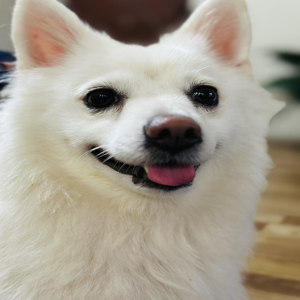

'Input Image'

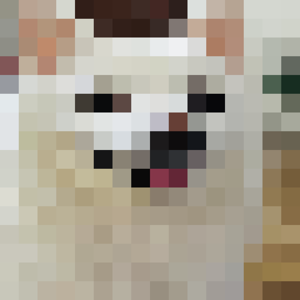

'Pixelated Image'

In [26]:
from IPython.display import display
from PIL import Image as PILImage

# Loading the input image
image_path = 'kiki.jpg'
input_image = cv2.imread(image_path)

# Check if the image was loaded successfully
if input_image is None:
    print(f"Error: Could not open or read the image at {image_path}")
else:
    # Get the input image's dimensions
    height, width = input_image.shape[:2]

    # Desired "pixelated" size
    pixelated_width, pixelated_height = (16, 16)

    # Resize the input image to the "pixelated" size
    temp_pixelated = cv2.resize(input_image, (pixelated_width, pixelated_height), interpolation=cv2.INTER_LINEAR)

    # Resize the "pixelated" image back to the original size
    output_image = cv2.resize(temp_pixelated, (width, height), interpolation=cv2.INTER_NEAREST)

    # Convert the OpenCV images to PIL format
    original_pil_image = PILImage.fromarray(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    pixelated_pil_image = PILImage.fromarray(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    # Display the original and pixelated images with reduced size in the notebook
    display(original_pil_image.resize((300, 300)), 'Input Image')
    display(pixelated_pil_image.resize((300, 300)), 'Pixelated Image')

## Template matching:


Template matching is a technique used in computer vision to find a sub-image (template) within a larger image.

OpenCV provides a built-in function called cv2.matchTemplate() for performing template matching.

In template matching, we slide the template image over the larger image as we do in the convolution process and find the matching part


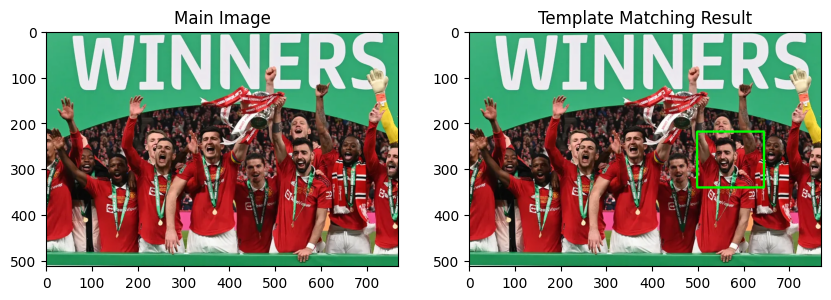

In [27]:
# Loading the main image and the template image
main_image = cv2.imread('manchester_united.jpg')
template_image = cv2.imread('burno.jpg')

# Converting both images to grayscale
main_image_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
template_image_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

# Using the cv2.matchTemplate function for template matching
result = cv2.matchTemplate(main_image_gray, template_image_gray, cv2.TM_CCOEFF_NORMED)

# Defining a threshold to determine matches
threshold = 0.8

# Finding all the locations where the match exceeds the threshold
locations = np.where(result >= threshold)

# Creating a copy of the main image for drawing rectangles
output_image = main_image.copy()

# Drawing rectangles around the matched areas
template_height, template_width = template_image_gray.shape[::-1]
for loc in zip(*locations[::-1]):
    cv2.rectangle(output_image, loc, (loc[0] + template_width, loc[1] + template_height), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)), plt.title('Main Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)), plt.title('Template Matching Result')
plt.show()